## Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math, time, random, datetime

import missingno

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

## File read

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("gender_submission.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploratory Data Analysis (EDA)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values
Age = 177 missing values

Cabin - 687 missing values

Embarked - 2 missing values

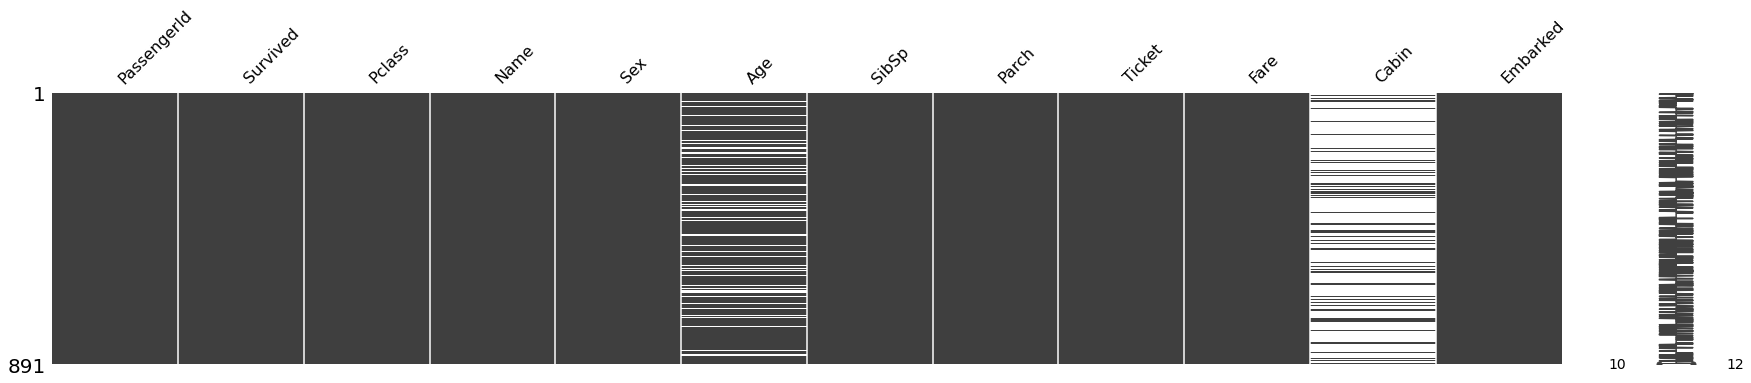

In [8]:
missingno.matrix(train_data, figsize = (30, 5))

### Survived

Description: People who survived and not

0 is "No", 1 is "Yes"

0    549
1    342
Name: Survived, dtype: int64


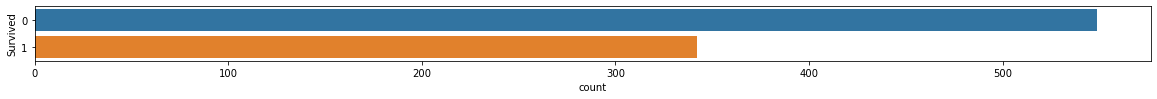

In [10]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y = 'Survived', data = train_data)
print(train_data.Survived.value_counts())

In [9]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [10]:
df_bin['Survived'] = train_data['Survived']
df_con['Survived'] = train_data['Survived']

In [11]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger

1 = 1st, 2 = 2nd, 3 = 3rd

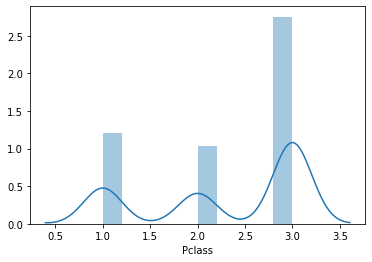

In [14]:
sns.distplot(train_data.Pclass)

### Outliers 

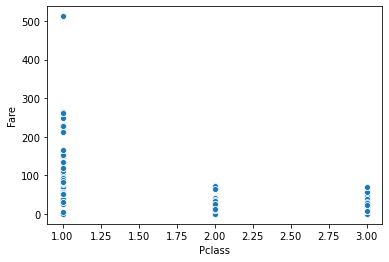

In [15]:
sns.scatterplot(data=train_data, x="Pclass", y="Fare")

As seen in the scatterplot above, we can identify that the fare values have outliers like the stray 512.329200 and 0. This graph however is not optimum

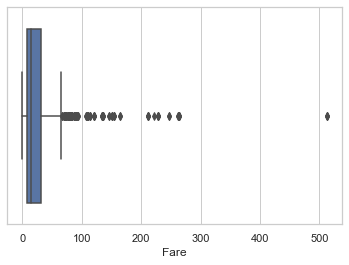

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data["Fare"])

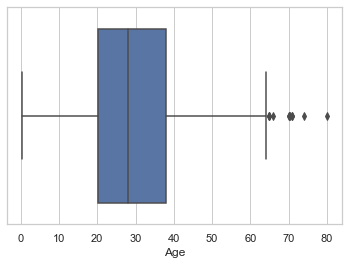

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data["Age"])

Age has outliers as well, there are people of the age of less than 1 on the ship

In [12]:
df_int = train_data[['Age', 'SibSp', 'Parch', 'Fare']]
df_ob = train_data[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

C:\Users\Park\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Park\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


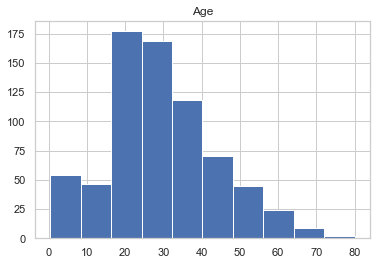

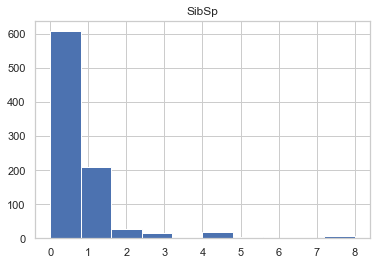

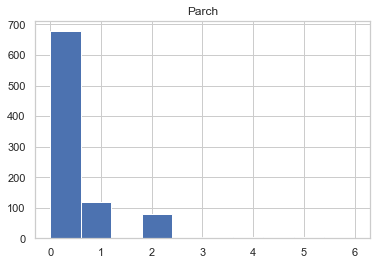

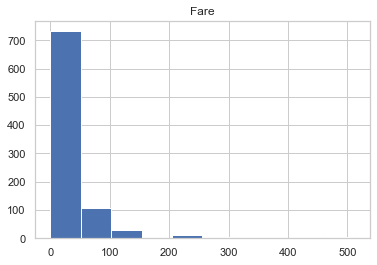

In [20]:
for i in df_int.columns:
    plt.hist(df_int[i])
    plt.title(i)
    plt.show()

In [13]:
df_bin['Pclass'] = train_data['Pclass']
df_con['Pclass'] = train_data['Pclass']

In [14]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Feature: Name

Description: the name of the passenger

In [15]:
train_data.Name.value_counts()

Jalsevac, Mr. Ivan              1
Green, Mr. George Henry         1
Sage, Miss. Stella Anna         1
Sinkkonen, Miss. Anna           1
Nicholson, Mr. Arthur Ernest    1
                               ..
Jenkin, Mr. Stephen Curnow      1
Stewart, Mr. Albert A           1
Sdycoff, Mr. Todor              1
Nicholls, Mr. Joseph Charles    1
Rugg, Miss. Emily               1
Name: Name, Length: 891, dtype: int64

In [16]:
train_data['name_title'] = train_data.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
train_data['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Capt              1
Lady              1
the Countess      1
Mme               1
Jonkheer          1
Don               1
Ms                1
Name: name_title, dtype: int64

In [17]:
pd.pivot_table(train_data, index = 'Survived', columns = 'name_title', values = 'Ticket' ,aggfunc ='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [115]:
df_bin['name_title'] = train_data['name_title']

# Changing Mr-Rev to 1-4, Miss and Mrs to 5 and Capt-Ms as 6 (Others)
df_bin['name_title'] = df_bin['name_title'].replace(['Mr', 'Dr', 'Master','Rev'],['1','2','3','4'])
df_bin['name_title'] = df_bin['name_title'].replace(['Miss','Mrs'],'5')
df_bin['name_title'] = df_bin['name_title'].replace(['Capt','Col', 'Don', 'Jonkheer', 'Major', 'Sir', 'the Countess', 'Lady', 'Ms', 'Mlle', 'Mme'],'6')

<ipython-input-115-686159c0faf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['name_title'] = train_data['name_title']
<ipython-input-115-686159c0faf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['name_title'] = df_bin['name_title'].replace(['Mr', 'Dr', 'Master','Rev'],['1','2','3','4'])
<ipython-input-115-686159c0faf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [114]:
# Do the same for con
df_con['name_title'] = train_data['name_title']

df_con['name_title'] = df_con['name_title'].replace(['Mr', 'Dr', 'Master','Rev'],['1','2','3','4'])
df_con['name_title'] = df_con['name_title'].replace(['Miss','Mrs'],'5')
df_con['name_title'] = df_con['name_title'].replace(['Capt','Col', 'Don', 'Jonkheer', 'Major', 'Sir', 'the Countess', 'Lady', 'Ms', 'Mlle', 'Mme'],'6')

In [109]:
df_bin

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,5,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,1,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S
...,...,...,...,...,...,...,...,...,...
886,0,2,4,0,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
887,1,1,5,1,"(16.336, 24.294]",0,0,"(-0.512, 102.466]",S
888,0,3,5,1,"(24.294, 32.252]",1,2,"(-0.512, 102.466]",S
889,1,1,1,0,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",C


In [110]:
df_con['name_title'] = train_data['name_title']

### Feature: Sex 

Description: The gender of each passenger (categorised in male or female)

male      577
female    314
Name: Sex, dtype: int64


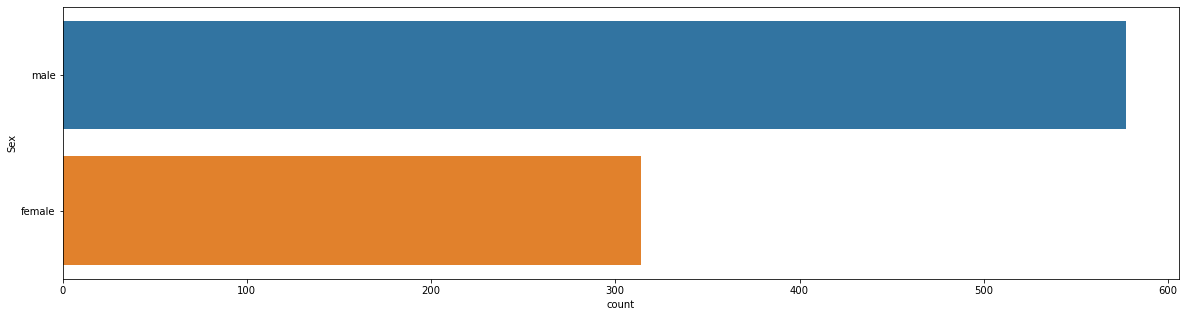

In [22]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y = 'Sex', data = train_data)
print(train_data.Sex.value_counts())

In [23]:
df_bin['Sex'] = train_data['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train_data['Sex']

In [24]:
df_bin

,Survived,Pclass,name_title,Sex
0,0,3,1,0
1,1,1,5,1
2,1,3,5,1
3,1,1,5,1
4,0,3,1,0
...,...,...,...,...
886,0,2,4,0
887,1,1,5,1
888,0,3,5,1
889,1,1,1,0


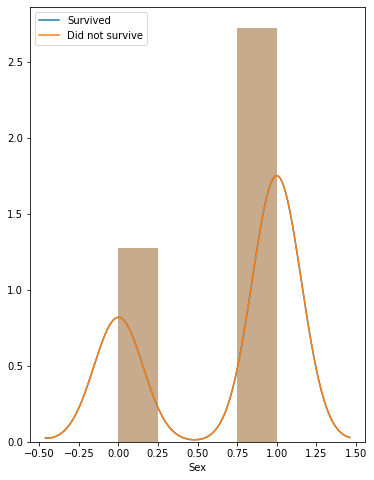

In [25]:
fig = plt.figure(figsize=(6,8))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label': 'Did not survive'})

many female surived over male despite having more male passengers on board

### Feature: Age 

Description: Age of a passenger

In [26]:
train_data.Age.isnull().sum()

177

In [27]:
train_data.Age = train_data.Age.fillna(train_data.Age.mean())

In [28]:
train_data.Age.isnull().sum()

0

In [29]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train_data['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train_data['Age'] # non-bucketed

In [30]:
train_data.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [31]:
df_bin

,Survived,Pclass,name_title,Sex,Age
0,0,3,1,0,"(16.336, 24.294]"
1,1,1,5,1,"(32.252, 40.21]"
2,1,3,5,1,"(24.294, 32.252]"
3,1,1,5,1,"(32.252, 40.21]"
4,0,3,1,0,"(32.252, 40.21]"
...,...,...,...,...,...
886,0,2,4,0,"(24.294, 32.252]"
887,1,1,5,1,"(16.336, 24.294]"
888,0,3,5,1,"(24.294, 32.252]"
889,1,1,1,0,"(24.294, 32.252]"


In [32]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp 

Description: The number of siblings.spouses the passenger has onboard the Titanic

In [35]:
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
df_bin['SibSp'] = train_data['SibSp']
df_con['SibSp'] = train_data['SibSp']

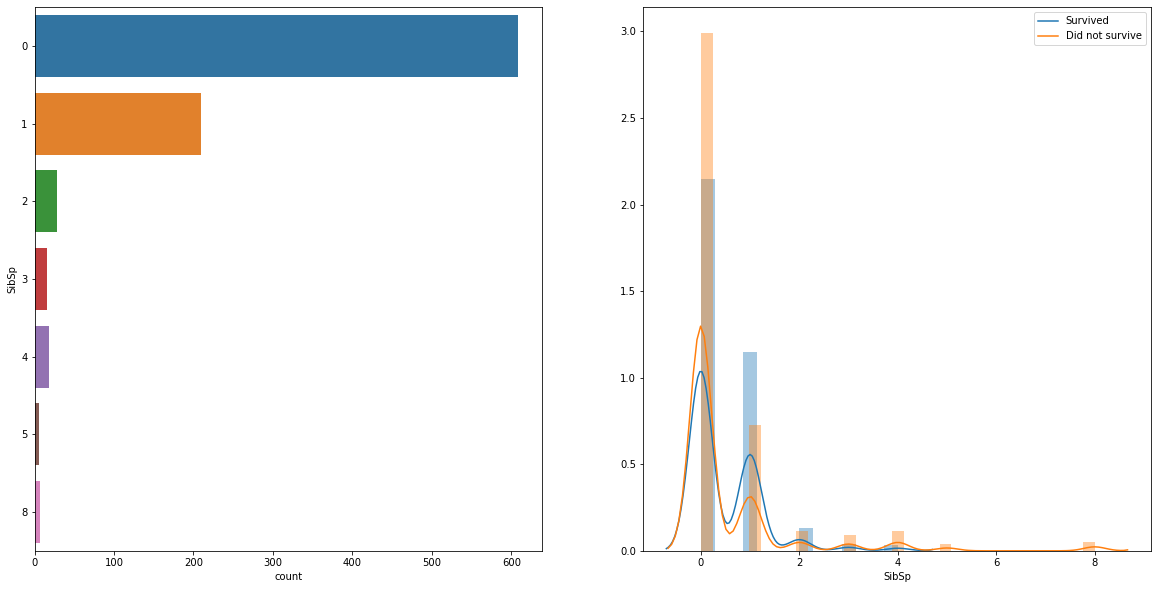

In [36]:
plot_count_dist(train_data,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(20, 10))

### Feature: Parch 

Description: The number of parents/children the passenger has aboard the Titanic.

In [37]:
train_data.Parch.isnull().sum()

0

In [38]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
df_bin['Parch'] = train_data['Parch']
df_con['Parch'] = train_data['Parch']

C:\Users\Park\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


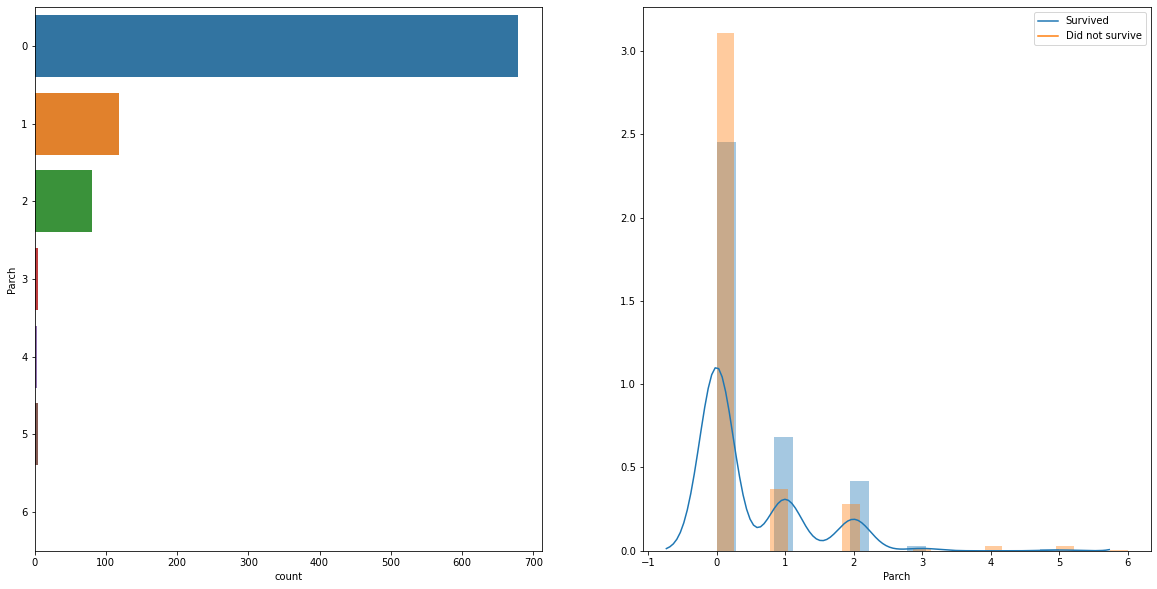

In [40]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train_data, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [41]:
df_con.head()

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch
0,0,3,Mr,male,22.0,1,0
1,1,1,Mrs,female,38.0,1,0
2,1,3,Miss,female,26.0,0,0
3,1,1,Mrs,female,35.0,1,0
4,0,3,Mr,male,35.0,0,0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [42]:
train_data.Ticket.isnull().sum()

0

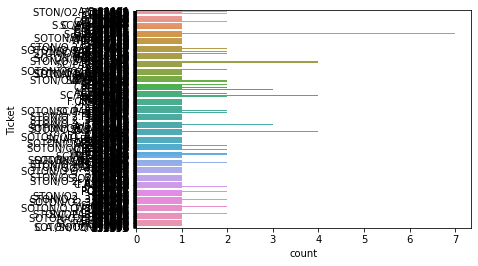

In [43]:
sns.countplot(y="Ticket", data=train_data);

In [44]:
train_data.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
A/5 3536    1
28213       1
364512      1
350407      1
349215      1
Name: Ticket, Length: 681, dtype: int64

In [45]:
print("There are {} unique Ticket values.".format(len(train_data.Ticket.unique())))

There are 681 unique Ticket values.


### Feature: Fare

Description: How much the ticket cost.

In [61]:
train_data.Fare.isnull().sum()

0

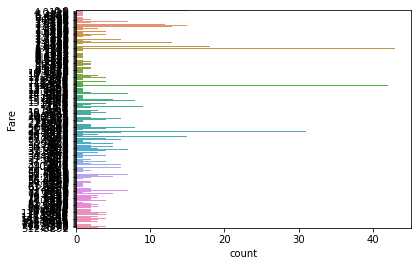

In [62]:
sns.countplot(y="Fare", data=train_data);

In [63]:
train_data.Fare.dtype

dtype('float64')

In [64]:
print("There are {} unique Fare values.".format(len(train_data.Fare.unique())))

There are 248 unique Fare values.


In [46]:
df_con['Fare'] = train_data['Fare'] 
df_bin['Fare'] = pd.cut(train_data['Fare'], bins=5) 

In [47]:
df_bin.head()

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]"
1,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
2,1,3,5,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]"
3,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
4,0,3,1,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]"


In [49]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

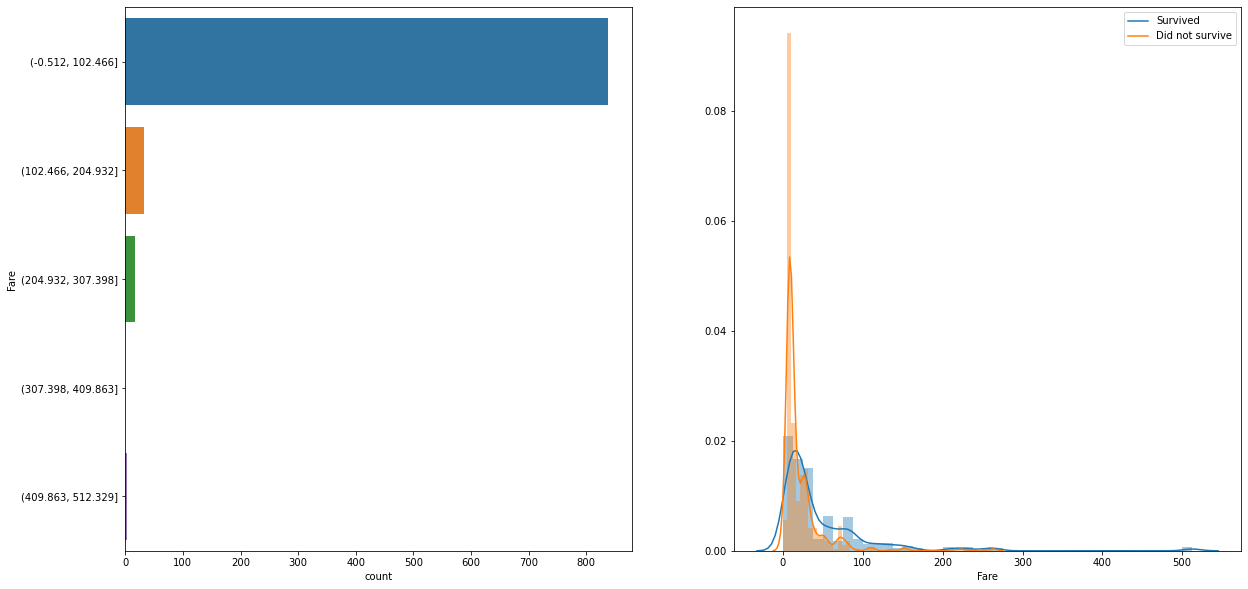

In [50]:
plot_count_dist(data=train_data,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin

Description: The cabin number where the passenger was staying.

In [51]:
train_data.Cabin.isnull().sum()

687

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [96]:
train_data.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
E49            1
E40            1
D56            1
B38            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

### Feature: Embarked

Description: Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [97]:
train_data.Embarked.isnull().sum()

2

In [98]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

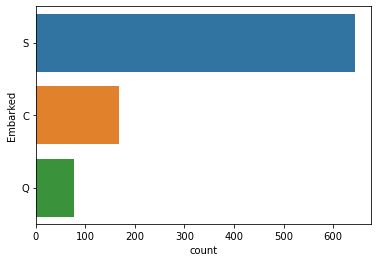

In [56]:
sns.countplot(y='Embarked', data=train_data)

In [57]:
df_bin['Embarked'] = train_data['Embarked']
df_con['Embarked'] = train_data['Embarked']

In [58]:
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [59]:
df_bin.head()

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,5,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,1,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [60]:
df_con.head()

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


### Feature Encoding

Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [116]:
df_bin.head()

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,5,1,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,5,1,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,1,0,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [117]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [118]:
df_con.head(10)

,Survived,Pclass,name_title,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,male,22.000000,1,0,7.2500,S
1,1,1,5,female,38.000000,1,0,71.2833,C
2,1,3,5,female,26.000000,0,0,7.9250,S
3,1,1,5,female,35.000000,1,0,53.1000,S
4,0,3,1,male,35.000000,0,0,8.0500,S
5,0,3,1,male,29.699118,0,0,8.4583,Q
6,0,1,1,male,54.000000,0,0,51.8625,S
7,0,3,3,male,2.000000,3,1,21.0750,S
8,1,3,5,female,27.000000,0,2,11.1333,S
9,1,2,5,female,14.000000,1,0,30.0708,C


In [119]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

df_name_title_one_hot = pd.get_dummies(df_con['name_title'], 
                                   prefix='name_title')

In [120]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_pclass_one_hot,
                        df_name_title_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked', 'name_title'], axis=1)

In [121]:
df_con_enc.head(20)

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0,0,0,0,0,1,0
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
5,0,29.699118,0,0,8.4583,0,1,0,0,1,0,0,1,1,0,0,0,0,0
6,0,54.000000,0,0,51.8625,0,0,1,0,1,1,0,0,1,0,0,0,0,0
7,0,2.000000,3,1,21.0750,0,0,1,0,1,0,0,1,0,0,1,0,0,0
8,1,27.000000,0,2,11.1333,0,0,1,1,0,0,0,1,0,0,0,0,1,0
9,1,14.000000,1,0,30.0708,1,0,0,1,0,0,1,0,0,0,0,0,1,0


### Machine Learning Model building

In [122]:
selected_df = df_con_enc

In [123]:
selected_df.head()

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [124]:
x_train = selected_df.drop('Survived', axis=1) #data
y_train = selected_df.Survived # labels

In [125]:
x_train.shape

(889, 18)

In [126]:
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [127]:
y_train.shape

(889,)

In [128]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Define a function to fit ml algo

Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

cv = cross validation

In [129]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [130]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\Park\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 83.8
Accuracy CV 10-Fold: 82.56
Running Time: 0:00:01.464979


### K-Nearest Neighbours

In [131]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  x_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.34
Accuracy CV 10-Fold: 73.45
Running Time: 0:00:00.674677


### Gaussian Naive Bayes

In [132]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 77.62
Accuracy CV 10-Fold: 77.05
Running Time: 0:00:00.023005


### Linear Support Vector Machines (SVC)

In [133]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 80.76
Accuracy CV 10-Fold: 75.93
Running Time: 0:00:00.080018


C:\Users\Park\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Stochastic Gradient Descent

In [134]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 74.24
Accuracy CV 10-Fold: 68.39
Running Time: 0:00:00.025511


### Decision Tree Classifier

In [135]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.43
Accuracy CV 10-Fold: 77.84
Running Time: 0:00:00.058522


### Gradient Boost Trees

In [136]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 90.44
Accuracy CV 10-Fold: 82.68
Running Time: 0:00:00.252067


### CatBoost Algorithm

CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple to use and generates high accuracy as well

In [137]:
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [138]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [139]:
# Define the categorical features for the CatBoost model
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

In [140]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(x_train, 
                  y_train,
                  cat_features)

In [141]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [142]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6871824	total: 15.2ms	remaining: 15.1s
1:	learn: 0.6817716	total: 29.9ms	remaining: 14.9s
2:	learn: 0.6764264	total: 41.4ms	remaining: 13.7s
3:	learn: 0.6702070	total: 61.5ms	remaining: 15.3s
4:	learn: 0.6644551	total: 92.8ms	remaining: 18.5s
5:	learn: 0.6584867	total: 108ms	remaining: 17.9s
6:	learn: 0.6527278	total: 124ms	remaining: 17.5s
7:	learn: 0.6477303	total: 157ms	remaining: 19.5s
8:	learn: 0.6426753	total: 186ms	remaining: 20.4s
9:	learn: 0.6376268	total: 207ms	remaining: 20.5s
10:	learn: 0.6322226	total: 231ms	remaining: 20.8s
11:	learn: 0.6269608	total: 246ms	remaining: 20.3s
12:	learn: 0.6230985	total: 279ms	remaining: 21.2s
13:	learn: 0.6186982	total: 295ms	remaining: 20.8s
14:	learn: 0.6142401	total: 324ms	remaining: 21.3s
15:	learn: 0.6096678	total: 339ms	remaining: 20.9s
16:	learn: 0.6042155	total: 377ms	remaining: 21.8s
17:	learn: 0.6006328	total: 396ms	remaining: 21.6s
18:	learn: 0.5956395	total: 418ms	remaining: 21.6s
19:	le

166:	learn: 0.3988866	total: 4.29s	remaining: 21.4s
167:	learn: 0.3986028	total: 4.32s	remaining: 21.4s
168:	learn: 0.3979415	total: 4.34s	remaining: 21.3s
169:	learn: 0.3976423	total: 4.36s	remaining: 21.3s
170:	learn: 0.3972329	total: 4.39s	remaining: 21.3s
171:	learn: 0.3972159	total: 4.39s	remaining: 21.1s
172:	learn: 0.3970350	total: 4.41s	remaining: 21.1s
173:	learn: 0.3964967	total: 4.44s	remaining: 21.1s
174:	learn: 0.3960954	total: 4.47s	remaining: 21.1s
175:	learn: 0.3956517	total: 4.48s	remaining: 21s
176:	learn: 0.3952403	total: 4.5s	remaining: 20.9s
177:	learn: 0.3948237	total: 4.53s	remaining: 20.9s
178:	learn: 0.3948083	total: 4.54s	remaining: 20.8s
179:	learn: 0.3942854	total: 4.56s	remaining: 20.8s
180:	learn: 0.3936679	total: 4.59s	remaining: 20.8s
181:	learn: 0.3932203	total: 4.61s	remaining: 20.7s
182:	learn: 0.3926304	total: 4.65s	remaining: 20.7s
183:	learn: 0.3923622	total: 4.67s	remaining: 20.7s
184:	learn: 0.3921742	total: 4.68s	remaining: 20.6s
185:	learn: 0.3

335:	learn: 0.3624550	total: 8.39s	remaining: 16.6s
336:	learn: 0.3622282	total: 8.41s	remaining: 16.5s
337:	learn: 0.3620326	total: 8.43s	remaining: 16.5s
338:	learn: 0.3619003	total: 8.44s	remaining: 16.5s
339:	learn: 0.3617569	total: 8.47s	remaining: 16.4s
340:	learn: 0.3616968	total: 8.5s	remaining: 16.4s
341:	learn: 0.3616963	total: 8.51s	remaining: 16.4s
342:	learn: 0.3615739	total: 8.54s	remaining: 16.4s
343:	learn: 0.3613736	total: 8.56s	remaining: 16.3s
344:	learn: 0.3611882	total: 8.59s	remaining: 16.3s
345:	learn: 0.3609638	total: 8.61s	remaining: 16.3s
346:	learn: 0.3609132	total: 8.64s	remaining: 16.3s
347:	learn: 0.3607344	total: 8.66s	remaining: 16.2s
348:	learn: 0.3605455	total: 8.68s	remaining: 16.2s
349:	learn: 0.3604657	total: 8.72s	remaining: 16.2s
350:	learn: 0.3604157	total: 8.75s	remaining: 16.2s
351:	learn: 0.3603037	total: 8.76s	remaining: 16.1s
352:	learn: 0.3600933	total: 8.81s	remaining: 16.1s
353:	learn: 0.3597098	total: 8.82s	remaining: 16.1s
354:	learn: 0

494:	learn: 0.3441660	total: 11.9s	remaining: 12.1s
495:	learn: 0.3440497	total: 11.9s	remaining: 12.1s
496:	learn: 0.3438300	total: 12s	remaining: 12.1s
497:	learn: 0.3436777	total: 12s	remaining: 12.1s
498:	learn: 0.3436369	total: 12s	remaining: 12.1s
499:	learn: 0.3435874	total: 12s	remaining: 12s
500:	learn: 0.3435048	total: 12.1s	remaining: 12s
501:	learn: 0.3435048	total: 12.1s	remaining: 12s
502:	learn: 0.3434899	total: 12.1s	remaining: 12s
503:	learn: 0.3434080	total: 12.1s	remaining: 11.9s
504:	learn: 0.3432476	total: 12.2s	remaining: 11.9s
505:	learn: 0.3431873	total: 12.2s	remaining: 11.9s
506:	learn: 0.3430653	total: 12.2s	remaining: 11.9s
507:	learn: 0.3429728	total: 12.2s	remaining: 11.9s
508:	learn: 0.3428363	total: 12.3s	remaining: 11.8s
509:	learn: 0.3427212	total: 12.3s	remaining: 11.8s
510:	learn: 0.3427003	total: 12.3s	remaining: 11.8s
511:	learn: 0.3427003	total: 12.3s	remaining: 11.8s
512:	learn: 0.3425026	total: 12.3s	remaining: 11.7s
513:	learn: 0.3423470	total:

656:	learn: 0.3300773	total: 15.9s	remaining: 8.28s
657:	learn: 0.3298268	total: 15.9s	remaining: 8.25s
658:	learn: 0.3298061	total: 15.9s	remaining: 8.23s
659:	learn: 0.3297846	total: 15.9s	remaining: 8.21s
660:	learn: 0.3297717	total: 16s	remaining: 8.19s
661:	learn: 0.3297717	total: 16s	remaining: 8.15s
662:	learn: 0.3297717	total: 16s	remaining: 8.12s
663:	learn: 0.3297184	total: 16s	remaining: 8.1s
664:	learn: 0.3296851	total: 16s	remaining: 8.07s
665:	learn: 0.3295987	total: 16.1s	remaining: 8.05s
666:	learn: 0.3295123	total: 16.1s	remaining: 8.03s
667:	learn: 0.3294987	total: 16.1s	remaining: 8s
668:	learn: 0.3294693	total: 16.1s	remaining: 7.97s
669:	learn: 0.3294428	total: 16.2s	remaining: 7.96s
670:	learn: 0.3294141	total: 16.2s	remaining: 7.94s
671:	learn: 0.3293679	total: 16.2s	remaining: 7.92s
672:	learn: 0.3293573	total: 16.2s	remaining: 7.89s
673:	learn: 0.3292445	total: 16.3s	remaining: 7.87s
674:	learn: 0.3291007	total: 16.3s	remaining: 7.84s
675:	learn: 0.3290694	tota

816:	learn: 0.3165362	total: 19.8s	remaining: 4.42s
817:	learn: 0.3164963	total: 19.8s	remaining: 4.4s
818:	learn: 0.3164900	total: 19.8s	remaining: 4.37s
819:	learn: 0.3163236	total: 19.8s	remaining: 4.35s
820:	learn: 0.3162900	total: 19.8s	remaining: 4.33s
821:	learn: 0.3162824	total: 19.9s	remaining: 4.3s
822:	learn: 0.3162064	total: 19.9s	remaining: 4.28s
823:	learn: 0.3161497	total: 19.9s	remaining: 4.25s
824:	learn: 0.3160890	total: 19.9s	remaining: 4.23s
825:	learn: 0.3160269	total: 19.9s	remaining: 4.2s
826:	learn: 0.3159148	total: 20s	remaining: 4.18s
827:	learn: 0.3158066	total: 20s	remaining: 4.15s
828:	learn: 0.3156733	total: 20s	remaining: 4.13s
829:	learn: 0.3155667	total: 20s	remaining: 4.1s
830:	learn: 0.3155421	total: 20.1s	remaining: 4.08s
831:	learn: 0.3154599	total: 20.1s	remaining: 4.05s
832:	learn: 0.3153754	total: 20.1s	remaining: 4.03s
833:	learn: 0.3151344	total: 20.1s	remaining: 4s
834:	learn: 0.3150662	total: 20.1s	remaining: 3.98s
835:	learn: 0.3148997	total

982:	learn: 0.2997284	total: 23.4s	remaining: 405ms
983:	learn: 0.2995567	total: 23.4s	remaining: 381ms
984:	learn: 0.2994756	total: 23.4s	remaining: 357ms
985:	learn: 0.2994595	total: 23.5s	remaining: 333ms
986:	learn: 0.2992507	total: 23.5s	remaining: 309ms
987:	learn: 0.2990492	total: 23.5s	remaining: 286ms
988:	learn: 0.2990317	total: 23.5s	remaining: 262ms
989:	learn: 0.2989836	total: 23.6s	remaining: 238ms
990:	learn: 0.2988986	total: 23.6s	remaining: 214ms
991:	learn: 0.2985769	total: 23.6s	remaining: 190ms
992:	learn: 0.2983958	total: 23.6s	remaining: 167ms
993:	learn: 0.2983392	total: 23.7s	remaining: 143ms
994:	learn: 0.2982883	total: 23.7s	remaining: 119ms
995:	learn: 0.2980898	total: 23.7s	remaining: 95.1ms
996:	learn: 0.2980260	total: 23.7s	remaining: 71.3ms
997:	learn: 0.2979694	total: 23.7s	remaining: 47.5ms
998:	learn: 0.2977750	total: 23.7s	remaining: 23.8ms
999:	learn: 0.2975655	total: 23.8s	remaining: 0us


In [143]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6722706	test: 0.6731232	best: 0.6731232 (0)
1:	learn: 0.6543102	test: 0.6560860	best: 0.6560860 (1)
2:	learn: 0.6371546	test: 0.6401716	best: 0.6401716 (2)
3:	learn: 0.6221644	test: 0.6255840	best: 0.6255840 (3)
4:	learn: 0.6088280	test: 0.6129959	best: 0.6129959 (4)
5:	learn: 0.5966899	test: 0.6012831	best: 0.6012831 (5)
6:	learn: 0.5841434	test: 0.5899601	best: 0.5899601 (6)
7:	learn: 0.5726026	test: 0.5794025	best: 0.5794025 (7)
8:	learn: 0.5620919	test: 0.5703557	best: 0.5703557 (8)
9:	learn: 0.5529538	test: 0.5618502	best: 0.5618502 (9)
10:	learn: 0.5431595	test: 0.5525319	best: 0.5525319 (10)
11:	learn: 0.5353030	test: 0.5454796	best: 0.5454796 (11)
12:	learn: 0.5270378	test: 0.5374850	best: 0.5374850 (12)
13:	learn: 0.5196341	test: 0.5309885	best: 0.5309885 (13)
14:	learn: 0.5123767	test: 0.5240089	best: 0.5240089 (14)
15:	learn: 0.5055955	test: 0.5181619	best: 0.5181619 (15)
16:	learn: 0.4985729	test: 0.5117788	best: 0.5117788 (16)
17:	learn: 0.4930411	test: 0.50642

141:	learn: 0.3478788	test: 0.4151245	best: 0.4151245 (141)
142:	learn: 0.3475284	test: 0.4151155	best: 0.4151155 (142)
143:	learn: 0.3470975	test: 0.4149874	best: 0.4149874 (143)
144:	learn: 0.3468679	test: 0.4149913	best: 0.4149874 (143)
145:	learn: 0.3465179	test: 0.4148654	best: 0.4148654 (145)
146:	learn: 0.3461602	test: 0.4148038	best: 0.4148038 (146)
147:	learn: 0.3458635	test: 0.4147224	best: 0.4147224 (147)
148:	learn: 0.3455394	test: 0.4146013	best: 0.4146013 (148)
149:	learn: 0.3452222	test: 0.4144223	best: 0.4144223 (149)
150:	learn: 0.3448908	test: 0.4145267	best: 0.4144223 (149)	total: 48.6s	remaining: 4m 33s
151:	learn: 0.3446762	test: 0.4142909	best: 0.4142909 (151)
152:	learn: 0.3443453	test: 0.4141437	best: 0.4141437 (152)
153:	learn: 0.3440238	test: 0.4142357	best: 0.4141437 (152)
154:	learn: 0.3437666	test: 0.4144526	best: 0.4141437 (152)
155:	learn: 0.3433516	test: 0.4146240	best: 0.4141437 (152)
156:	learn: 0.3430655	test: 0.4146473	best: 0.4141437 (152)
157:	lear

280:	learn: 0.3051993	test: 0.4133090	best: 0.4132549 (279)
281:	learn: 0.3048503	test: 0.4134116	best: 0.4132549 (279)
282:	learn: 0.3046299	test: 0.4134318	best: 0.4132549 (279)
283:	learn: 0.3042992	test: 0.4133552	best: 0.4132549 (279)
284:	learn: 0.3040521	test: 0.4133791	best: 0.4132549 (279)
285:	learn: 0.3037143	test: 0.4132148	best: 0.4132148 (285)
286:	learn: 0.3034273	test: 0.4132494	best: 0.4132148 (285)
287:	learn: 0.3030342	test: 0.4130537	best: 0.4130537 (287)	total: 1m 31s	remaining: 3m 46s
288:	learn: 0.3027951	test: 0.4131917	best: 0.4130537 (287)
289:	learn: 0.3024218	test: 0.4131591	best: 0.4130537 (287)
290:	learn: 0.3022130	test: 0.4131141	best: 0.4130537 (287)
291:	learn: 0.3019184	test: 0.4129922	best: 0.4129922 (291)
292:	learn: 0.3016333	test: 0.4129963	best: 0.4129922 (291)
293:	learn: 0.3013169	test: 0.4130344	best: 0.4129922 (291)
294:	learn: 0.3008901	test: 0.4130038	best: 0.4129922 (291)
295:	learn: 0.3005917	test: 0.4129546	best: 0.4129546 (295)
296:	lea

425:	learn: 0.2604261	test: 0.4113864	best: 0.4110806 (406)
426:	learn: 0.2601797	test: 0.4113911	best: 0.4110806 (406)
427:	learn: 0.2598935	test: 0.4113358	best: 0.4110806 (406)
428:	learn: 0.2597157	test: 0.4112515	best: 0.4110806 (406)
429:	learn: 0.2592805	test: 0.4113814	best: 0.4110806 (406)
430:	learn: 0.2589909	test: 0.4112834	best: 0.4110806 (406)
431:	learn: 0.2586803	test: 0.4111464	best: 0.4110806 (406)
432:	learn: 0.2584362	test: 0.4111626	best: 0.4110806 (406)
433:	learn: 0.2581610	test: 0.4111766	best: 0.4110806 (406)
434:	learn: 0.2577971	test: 0.4109107	best: 0.4109107 (434)
435:	learn: 0.2575207	test: 0.4111251	best: 0.4109107 (434)
436:	learn: 0.2573387	test: 0.4111326	best: 0.4109107 (434)
437:	learn: 0.2571305	test: 0.4109843	best: 0.4109107 (434)
438:	learn: 0.2569433	test: 0.4109049	best: 0.4109049 (438)
439:	learn: 0.2566595	test: 0.4108716	best: 0.4108716 (439)	total: 2m 25s	remaining: 3m 5s
440:	learn: 0.2562761	test: 0.4107427	best: 0.4107427 (440)
441:	lear

565:	learn: 0.2267293	test: 0.4123766	best: 0.4106031 (441)
566:	learn: 0.2265720	test: 0.4125356	best: 0.4106031 (441)
567:	learn: 0.2264522	test: 0.4124518	best: 0.4106031 (441)
568:	learn: 0.2262279	test: 0.4124347	best: 0.4106031 (441)
569:	learn: 0.2258944	test: 0.4126057	best: 0.4106031 (441)
570:	learn: 0.2256585	test: 0.4126422	best: 0.4106031 (441)
571:	learn: 0.2254263	test: 0.4125948	best: 0.4106031 (441)
572:	learn: 0.2252754	test: 0.4126698	best: 0.4106031 (441)
573:	learn: 0.2250375	test: 0.4127984	best: 0.4106031 (441)
574:	learn: 0.2248129	test: 0.4128538	best: 0.4106031 (441)
575:	learn: 0.2246322	test: 0.4127086	best: 0.4106031 (441)
576:	learn: 0.2244742	test: 0.4127044	best: 0.4106031 (441)
577:	learn: 0.2242886	test: 0.4126677	best: 0.4106031 (441)
578:	learn: 0.2240561	test: 0.4127431	best: 0.4106031 (441)
579:	learn: 0.2238012	test: 0.4127307	best: 0.4106031 (441)
580:	learn: 0.2236172	test: 0.4127079	best: 0.4106031 (441)	total: 3m 10s	remaining: 2m 17s
581:	lea

704:	learn: 0.2005141	test: 0.4137545	best: 0.4106031 (441)
705:	learn: 0.2003273	test: 0.4137363	best: 0.4106031 (441)
706:	learn: 0.2001607	test: 0.4138799	best: 0.4106031 (441)
707:	learn: 0.1999998	test: 0.4138747	best: 0.4106031 (441)
708:	learn: 0.1997888	test: 0.4139709	best: 0.4106031 (441)
709:	learn: 0.1995467	test: 0.4140432	best: 0.4106031 (441)
710:	learn: 0.1993949	test: 0.4140196	best: 0.4106031 (441)
711:	learn: 0.1992969	test: 0.4140252	best: 0.4106031 (441)
712:	learn: 0.1991565	test: 0.4140528	best: 0.4106031 (441)
713:	learn: 0.1989601	test: 0.4139602	best: 0.4106031 (441)	total: 3m 54s	remaining: 1m 34s
714:	learn: 0.1987594	test: 0.4140486	best: 0.4106031 (441)
715:	learn: 0.1984855	test: 0.4139670	best: 0.4106031 (441)
716:	learn: 0.1983220	test: 0.4139404	best: 0.4106031 (441)
717:	learn: 0.1981578	test: 0.4140506	best: 0.4106031 (441)
718:	learn: 0.1980057	test: 0.4140527	best: 0.4106031 (441)
719:	learn: 0.1978329	test: 0.4141026	best: 0.4106031 (441)
720:	lea

843:	learn: 0.1789745	test: 0.4180826	best: 0.4106031 (441)
844:	learn: 0.1788494	test: 0.4181558	best: 0.4106031 (441)
845:	learn: 0.1787216	test: 0.4182639	best: 0.4106031 (441)
846:	learn: 0.1785366	test: 0.4183669	best: 0.4106031 (441)
847:	learn: 0.1783743	test: 0.4184108	best: 0.4106031 (441)
848:	learn: 0.1781954	test: 0.4185331	best: 0.4106031 (441)
849:	learn: 0.1780348	test: 0.4186151	best: 0.4106031 (441)
850:	learn: 0.1779291	test: 0.4186921	best: 0.4106031 (441)
851:	learn: 0.1777811	test: 0.4185922	best: 0.4106031 (441)
852:	learn: 0.1776546	test: 0.4186418	best: 0.4106031 (441)
853:	learn: 0.1775196	test: 0.4187052	best: 0.4106031 (441)
854:	learn: 0.1773769	test: 0.4189416	best: 0.4106031 (441)
855:	learn: 0.1772252	test: 0.4190962	best: 0.4106031 (441)
856:	learn: 0.1771114	test: 0.4192543	best: 0.4106031 (441)
857:	learn: 0.1769618	test: 0.4192179	best: 0.4106031 (441)	total: 4m 47s	remaining: 47.6s
858:	learn: 0.1768260	test: 0.4193539	best: 0.4106031 (441)
859:	lear

988:	learn: 0.1604562	test: 0.4234421	best: 0.4106031 (441)
989:	learn: 0.1603758	test: 0.4234027	best: 0.4106031 (441)
990:	learn: 0.1602571	test: 0.4235131	best: 0.4106031 (441)
991:	learn: 0.1601290	test: 0.4236095	best: 0.4106031 (441)
992:	learn: 0.1600168	test: 0.4236401	best: 0.4106031 (441)
993:	learn: 0.1599269	test: 0.4236389	best: 0.4106031 (441)
994:	learn: 0.1598105	test: 0.4237743	best: 0.4106031 (441)
995:	learn: 0.1596813	test: 0.4237316	best: 0.4106031 (441)
996:	learn: 0.1596070	test: 0.4237500	best: 0.4106031 (441)
997:	learn: 0.1594830	test: 0.4238982	best: 0.4106031 (441)
998:	learn: 0.1593845	test: 0.4239211	best: 0.4106031 (441)
999:	learn: 0.1592667	test: 0.4240282	best: 0.4106031 (441)	total: 5m 37s	remaining: 0us


In [144]:
print("Accuracy: %s" % acc_catboost)
print("Accuracy CV 10-Fold: %s" % acc_cv_catboost)
print("Running Time: %s" % datetime.timedelta(seconds=catboost_time))

Accuracy: 87.29
Accuracy CV 10-Fold: 83.8
Running Time: 0:05:37.783415


### Model Results

Which model had the best cross-validation accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

### Regular accuracy scores

In [145]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Regular Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Regular Accuracy Scores---


,Model,Score
5,Decision Tree,98.43
6,Gradient Boosting Trees,90.44
7,CatBoost,87.29
1,Logistic Regression,83.80
0,KNN,82.34
4,Linear SVC,80.76
2,Naive Bayes,77.62
3,Stochastic Gradient Decent,74.24


In [146]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.80
6,Gradient Boosting Trees,82.68
1,Logistic Regression,82.56
5,Decision Tree,77.84
2,Naive Bayes,77.05
4,Linear SVC,75.93
0,KNN,73.45
3,Stochastic Gradient Decent,68.39


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the .fit() models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

Challenge: How could you improve the CatBoost model?

### Feature Importance

In [147]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
17,0.137122,name_title_6
13,0.256586,name_title_2
15,0.365324,name_title_4
5,0.809127,embarked_Q
4,0.979084,embarked_C
6,1.890950,embarked_S
10,2.220522,pclass_2
14,3.117686,name_title_3
9,3.977193,pclass_1
16,6.623243,name_title_5


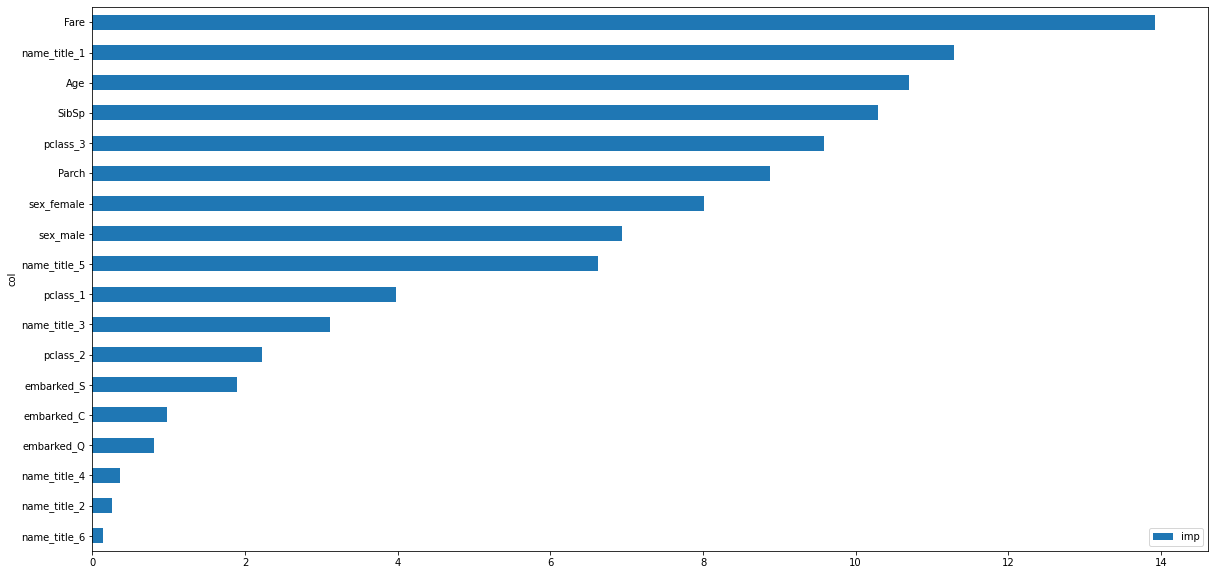

In [148]:
# Plot the feature importance scores
feature_importance(catboost_model, x_train)

### Precision and Recall

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

It gives an F1 score, so the predicted case would more or less be correct.

### Submission

In [150]:
# testing 
x_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,1,0
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0,0,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0,0,0


In [154]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,5


In [153]:
test_data['name_title'] = test_data.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

test_data['name_title'] = test_data['name_title'].replace(['Mr', 'Dr', 'Master','Rev'],['1','2','3','4'])
test_data['name_title'] = test_data['name_title'].replace(['Miss','Mrs'],'5')
test_data['name_title'] = test_data['name_title'].replace(['Capt','Col', 'Don', 'Jonkheer', 'Major', 'Sir', 'the Countess', 'Lady', 'Ms', 'Mlle', 'Mme'],'6')

In [157]:
test_embarked_one_hot = pd.get_dummies(test_data['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test_data['Sex'], 
                                prefix='sex')

test_pclass_one_hot = pd.get_dummies(test_data['Pclass'], 
                                   prefix='pclass')

test_name_title_one_hot = pd.get_dummies(test_data['name_title'], 
                                   prefix='name_title')

In [159]:
# Combine the test one hot encoded columns with test
test_data = pd.concat([test_data, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_pclass_one_hot,
                  test_name_title_one_hot], axis=1)

In [161]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,pclass_1,pclass_2,pclass_3,name_title_1,name_title_2,name_title_3,name_title_4,name_title_5,name_title_6,name_title_Dona
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,1,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,0,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,1,0,0,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,1,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,0,0,0,0,1,0,0


In [162]:
# Create a list of columns to be used for the predictions
final_test_columns = x_train.columns
final_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3', 'name_title_1', 'name_title_2', 'name_title_3',
       'name_title_4', 'name_title_5', 'name_title_6'],
      dtype='object')

In [164]:
final_predictions = catboost_model.predict(test_data[final_test_columns])

In [166]:
final_predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [168]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_data['PassengerId']
submission['Survived'] = final_predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [170]:
# convert column 'Survived' to type int
submission['Survived'] = submission['Survived'].astype(int)

In [172]:
if len(submission) == len(test_data):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [173]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
